In [1]:
import pandas as pd
from utils.data_loader import load_data

df, config, features = load_data()

In [2]:
df.sex.value_counts()

Male       1473
Female     1221
male        645
female      547
Female        3
Male          2
female        2
male          2
Name: sex, dtype: int64

Missing values in 'age': 0
Missing values in 'sex': 335


/tmp/ipykernel_3482681/3262902223.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='age', data=df, palette="coolwarm", showfliers=False)


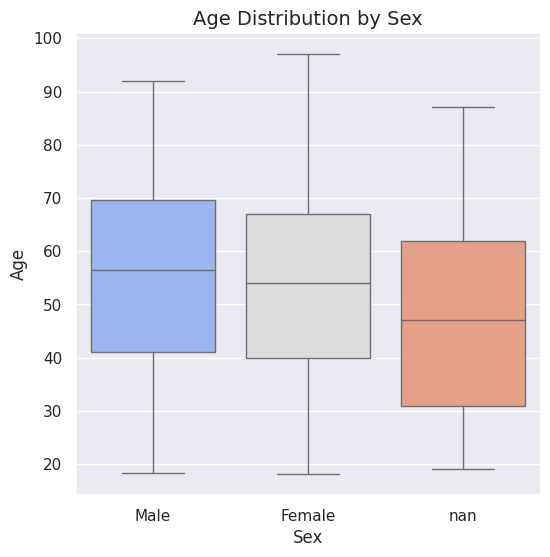

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df.sex = df['sex'].str.strip()
df.sex = df['sex'].str.capitalize()

# Step 2: Drop duplicate columns if necessary
df = df.loc[:, ~df.columns.duplicated()]

# Step 3: Check for NaN or missing values in the 'age' and 'sex' columns
print("Missing values in 'age':", df['age'].isnull().sum())
print("Missing values in 'sex':", df['sex'].isnull().sum())

# Step 4: Ensure correct data types
df['age'] = pd.to_numeric(df['age'], errors='coerce')  # Convert 'age' to numeric, invalid parsing as NaN
df['sex'] = df['sex'].astype(str)  # Convert 'sex' to string

# Step 5: Drop rows with missing values in 'age' or 'sex' (if necessary)
df.dropna(subset=['age', 'sex'], inplace=True)

# Create the boxplot
plt.figure(figsize=(6, 6))
sns.set(style="darkgrid")

# Plotting the boxplot with 'sex' on x-axis and 'age' on y-axis
sns.boxplot(x='sex', y='age', data=df, palette="coolwarm", showfliers=False)

# Adding title and labels
plt.title('Age Distribution by Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Show the plot
plt.show()

In [4]:
import numpy as np

df.sex.value_counts()
print(f"Male percentage: {df.sex.value_counts()['Male'] / len(df) * 100}%   ")
print(f"Female percentage: {df.sex.value_counts()['Female'] / len(df) * 100}%")


Male percentage: 50.16548463356973%   
Female percentage: 41.91489361702128%


In [5]:
# give me the age range of the data
print(df['age'].describe())


count    4230.000000
mean       53.524510
std        17.990387
min        18.106850
25%        39.000000
50%        55.000000
75%        68.000000
max       121.440000
Name: age, dtype: float64
